In [20]:
from datetime import datetime

import matplotlib.pyplot as plt
import torch
import numpy as np
from pathlib import Path

from utils.settings.config import LINEAR_ENCODER, CROP_ENCODING
num_discrete_labels = len(set(LINEAR_ENCODER.values()))

def starttimer():
    start = datetime.now()
    print(f'{start.strftime("%Y-%m-%d %H:%M:%S")}')
    return start

def endtimer(start):
    end = datetime.now()
    print(f'{end.strftime("%Y-%m-%d %H:%M:%S")}')
    durn = end - start
    print(f'Duration: {durn.total_seconds()}s')
    return end, durn

In [2]:
run_path = "logs/unet/20220807233511/run_20220807233511/"
run_path = Path(run_path)

testrun_path = Path(run_path / f'testrun_{datetime.now().strftime("%Y%m%d_%H%M%S")}')
testrun_path.mkdir(exist_ok=True, parents=True)

In [3]:
confusion_matrix = torch.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), dtype=torch.uint8, device='cuda')
pred = torch.randint(11, (833504,), dtype=torch.uint8, device='cuda')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-08-25 14:53:40
2022-08-25 14:57:27
Duration: 227.184366s


In [4]:
confusion_matrix = torch.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), device='cuda')
pred = torch.randint(11, (833504,), device='cuda')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-08-25 14:57:27
2022-08-25 15:00:36
Duration: 188.693071s


In [5]:
confusion_matrix = torch.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), dtype=torch.uint8, device='cpu')
pred = torch.randint(11, (833504,), dtype=torch.uint8, device='cpu')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-08-25 15:00:36
2022-08-25 15:01:24
Duration: 47.71449s


In [6]:
confusion_matrix = np.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (833504,), device='cpu')
pred = torch.randint(11, (833504,), device='cpu')
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-08-25 15:01:24
2022-08-25 15:01:29
Duration: 5.024363s


In [7]:
confusion_matrix = np.zeros([num_discrete_labels, num_discrete_labels])
label = torch.randint(11, (224,61,61,)).cpu().detach().numpy().flatten()
pred = torch.randint(11, (224,61,61,)).cpu().detach().numpy().flatten()
s = starttimer()
for i in range(label.shape[0]):
    confusion_matrix[label[i], pred[i]] += 1
e,d = endtimer(s)

2022-08-25 15:01:29
2022-08-25 15:01:29
Duration: 0.451002s


In [8]:
from sklearn.metrics import confusion_matrix
cm = np.zeros([num_discrete_labels-1, num_discrete_labels-1])

label = torch.randint(11, (224,61,61,)).flatten().cpu().detach()
pred = torch.randint(11, (224,61,61,)).flatten().cpu().detach()

s = starttimer()
cm_delta = confusion_matrix(label, pred)
cm = cm + cm_delta
e,d = endtimer(s)

2022-08-25 15:01:33
2022-08-25 15:01:33
Duration: 0.128999s


In [9]:
from torchmetrics.functional import dice

dice_score = []
for i in range(10):
    label = torch.randint(12, (224,61,61,)).flatten().cpu().detach()
    pred = torch.randint(12, (224,61,61,)).flatten().cpu().detach()
    step_dice_score = dice(pred, label, num_classes=12, multiclass=True, zero_division=1, ignore_index=0, average='none')
    dice_score.append(step_dice_score.numpy())

dice_score = np.array(dice_score)
dice_score = dice_score[:,1:] # Drop zero label

print(f"Dice Score\n{dice_score}")
print(np.average(dice_score, axis=0))


Dice Score
[[0.08338793 0.08402985 0.08218687 0.08348095 0.08379845 0.08271375
  0.08306189 0.08300261 0.08131944 0.08304838 0.08279964]
 [0.08331831 0.08404292 0.08245614 0.0823548  0.0834732  0.08327319
  0.08336751 0.08413959 0.08428075 0.08172828 0.08249607]
 [0.08374235 0.08407332 0.0830284  0.08311868 0.08161706 0.08402939
  0.08311137 0.08388375 0.08222433 0.08174383 0.08285455]
 [0.08357424 0.08195778 0.08470029 0.0838924  0.08507675 0.0816356
  0.08352584 0.08247229 0.08245899 0.08163265 0.08360764]
 [0.08306613 0.08403604 0.08407713 0.08329131 0.08254001 0.08181962
  0.08401705 0.08432618 0.08404692 0.08382379 0.08348818]
 [0.08375444 0.08405467 0.08326568 0.08214609 0.0850073  0.0838413
  0.08367936 0.08358496 0.08480438 0.08360482 0.08251372]
 [0.0826805  0.08187539 0.08219218 0.08535796 0.08239873 0.08250315
  0.08345667 0.08409053 0.08200019 0.08360995 0.08409499]
 [0.08337353 0.08487811 0.08294261 0.08384591 0.08343993 0.08312983
  0.08281019 0.08257441 0.08249691 0.0839

### Test normalisation of confusion matrix

In [18]:
# Normalize each row of the confusion matrix because class imbalance is
# high and visualization is difficult
row_mins = cm.min(axis=1)
row_maxs = cm.max(axis=1)
row_range = row_maxs - row_mins

print(f"row_maxs={row_maxs}")
print(f"row_mins={row_mins}")
print(f"row_range={row_range}")

print(f"row_range[:, None]\n{row_range[:, None]}")
print(f"row_mins[:, None]\n{row_mins[:, None]}")

row_maxs=[6979. 6960. 6947. 7041. 7018. 7071. 7111. 6981. 7030. 7034. 7101.]
row_mins=[6734. 6724. 6790. 6768. 6695. 6795. 6699. 6790. 6746. 6690. 6720.]
row_range=[245. 236. 157. 273. 323. 276. 412. 191. 284. 344. 381.]
row_range[:, None]
[[245.]
 [236.]
 [157.]
 [273.]
 [323.]
 [276.]
 [412.]
 [191.]
 [284.]
 [344.]
 [381.]]
row_mins[:, None]
[[6734.]
 [6724.]
 [6790.]
 [6768.]
 [6695.]
 [6795.]
 [6699.]
 [6790.]
 [6746.]
 [6690.]
 [6720.]]


In [19]:
cm_norm =  (cm - row_mins[:, None]) / row_range[:, None]
print(f"cm_norm\n{cm_norm}")

cm_norm
[[0.90612245 0.5877551  0.74693878 0.50612245 0.8244898  0.
  1.         0.48163265 0.72244898 0.56326531 0.87755102]
 [1.         0.86016949 0.59745763 0.83474576 0.36864407 0.1440678
  0.84745763 0.         0.77542373 0.45762712 0.64830508]
 [1.         0.93630573 0.79617834 0.78980892 0.36942675 0.10191083
  0.56050955 0.05732484 0.47770701 0.13375796 0.        ]
 [0.87545788 0.23443223 0.         1.         0.19047619 0.64102564
  0.67399267 0.6959707  0.51648352 0.42857143 0.06959707]
 [0.30959752 0.49535604 0.6006192  0.58204334 0.6749226  1.
  0.93498452 0.         0.12383901 0.37151703 0.6501548 ]
 [0.11594203 0.         0.17753623 0.66304348 0.41666667 0.64855072
  0.34057971 0.82246377 1.         0.3115942  0.58695652]
 [0.74029126 0.66504854 0.19417476 0.41504854 0.55825243 0.65291262
  0.72087379 0.58252427 1.         0.39805825 0.        ]
 [1.         0.96858639 0.64397906 0.72774869 0.41884817 0.28272251
  0.37696335 0.         0.30890052 0.51308901 0.07853403]
 

In [ ]:
# Replace invalid values with 0
cm_norm = np.nan_to_num(cm_norm, nan=0.0, posinf=0.0, neginf=0.0)

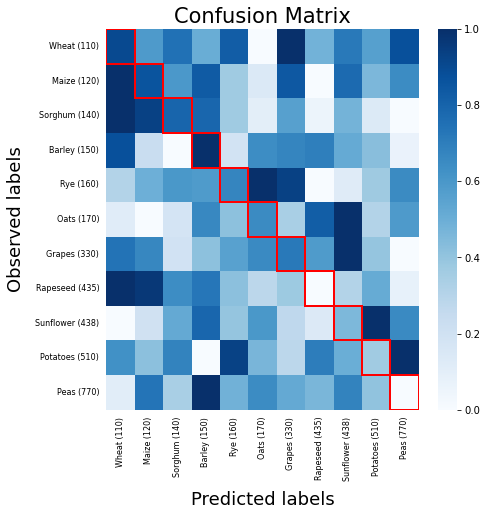

In [21]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

crop_encoding_rev = {v: k for k, v in CROP_ENCODING.items()}
crop_encoding = {k: crop_encoding_rev[k] for k in LINEAR_ENCODER.keys() if k != 0}
crop_encoding[0] = 'Background/Other'

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(7, 7))
sns.heatmap(cm_norm, annot=False, ax=ax, cmap="Blues", fmt="g")

# Labels, title and ticks
label_font = {'size': '18'}
ax.set_xlabel('Predicted labels', fontdict=label_font, labelpad=10)
ax.set_ylabel('Observed labels', fontdict=label_font, labelpad=10)

ax.set_xticks(list(np.arange(0.5, len(LINEAR_ENCODER.keys()) - 1 + 0.5)))
ax.set_yticks(list(np.arange(0.5, len(LINEAR_ENCODER.keys()) - 1 + 0.5)))

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.set_xticklabels([f'{crop_encoding[k]} ({k})' for k in sorted(LINEAR_ENCODER.keys()) if k != 0], fontsize=8, rotation='vertical')
ax.set_yticklabels([f'{crop_encoding[k]} ({k})' for k in sorted(LINEAR_ENCODER.keys()) if k != 0], fontsize=8, rotation='horizontal')

ax.tick_params(axis='both', which='major')

title_font = {'size': '21'}
ax.set_title('Confusion Matrix', fontdict=title_font)

for i in range(len(LINEAR_ENCODER.keys()) - 1):
    ax.add_patch(Rectangle((i, i), 1, 1, fill=False, edgecolor='red', lw=2))

plt.show()


## Calculate Embedded Dimensions from number of layers and input dimensions

In [47]:
tile_dim = 366
num_patches = 6
num_layers = 4
num_heads = 1

output_dim = img_dim = int(tile_dim/num_patches)
print(f"Input Dimension: [{img_dim} x {img_dim}]")
for i in range(num_layers-1):    output_dim = output_dim // 2

embed_dim = output_dim*output_dim # dimension of pixel grad in final downsample layer
print(f"Embedded Dimensions: [{output_dim} x {output_dim}] = {embed_dim} ")

# Validate that embedded dimensions can be split evenly across number of heads
head_dim = embed_dim // num_heads
assert head_dim * num_heads == embed_dim, "embed_dim must be divisible by num_heads"
print(f"Number of Heads: {num_heads} | Embedded Dimensions per Head: {head_dim}")

Input Dimension: [61 x 61]
Embedded Dimensions: [7 x 7] = 49 
Number of Heads: 1 | Embedded Dimensions per Head: 49


In [42]:
mhsa = False
mhca = True
if mhsa and not mhca:
    text = "U-Net with MHSA only"
elif mhca and not mhsa:
    text = "U-Net with MHCA only"
else:
    text = "U-Net Transformer (U-Net with MHSA and MHCA)"
print(text)


U-Net Transformer (U-Net with MHSA and MHCA)
